In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid')

In [16]:
df = pd.read_excel("Online Retail.xlsx", engine='openpyxl')
print("Original Shape:", df.shape)
df.head()

Original Shape: (120, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,41547,500253,SILVER BOTTLE,1,2011-06-04,30.33,66666,France
1,41361,500397,YELLOW BAG,13,2011-09-14,43.02,66666,Italy
2,48006,500280,YELLOW BAG,16,2011-10-19,9.47,88888,France
3,45695,500180,YELLOW BAG,5,2011-06-27,10.76,66666,Germany
4,40599,500316,WHITE FRAME,6,2011-08-01,26.23,77777,France


In [17]:
print("\nData Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nStatistical Summary:")
print(df.describe())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    120 non-null    int64         
 1   StockCode    120 non-null    int64         
 2   Description  120 non-null    object        
 3   Quantity     120 non-null    int64         
 4   InvoiceDate  120 non-null    datetime64[ns]
 5   UnitPrice    120 non-null    float64       
 6   CustomerID   120 non-null    int64         
 7   Country      120 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 7.6+ KB
None

Missing Values:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Statistical Summary:
          InvoiceNo      StockCode    Quantity          InvoiceDate  \
count    120.000000     120.000000  120.000000   

In [18]:
df = df.dropna(subset=["CustomerID"])
df = df[df["Quantity"] > 0]
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
print("\nAfter Cleaning Shape:", df.shape)



After Cleaning Shape: (120, 9)


In [19]:
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["MonthYear"] = df["InvoiceDate"].dt.to_period("M")

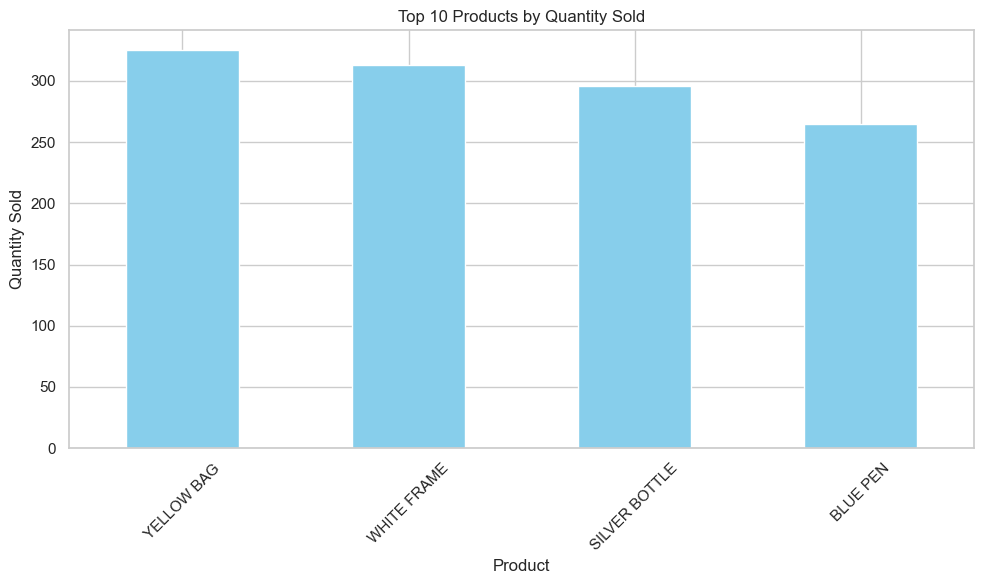

In [20]:
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_products.plot(kind="bar", color="skyblue")
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


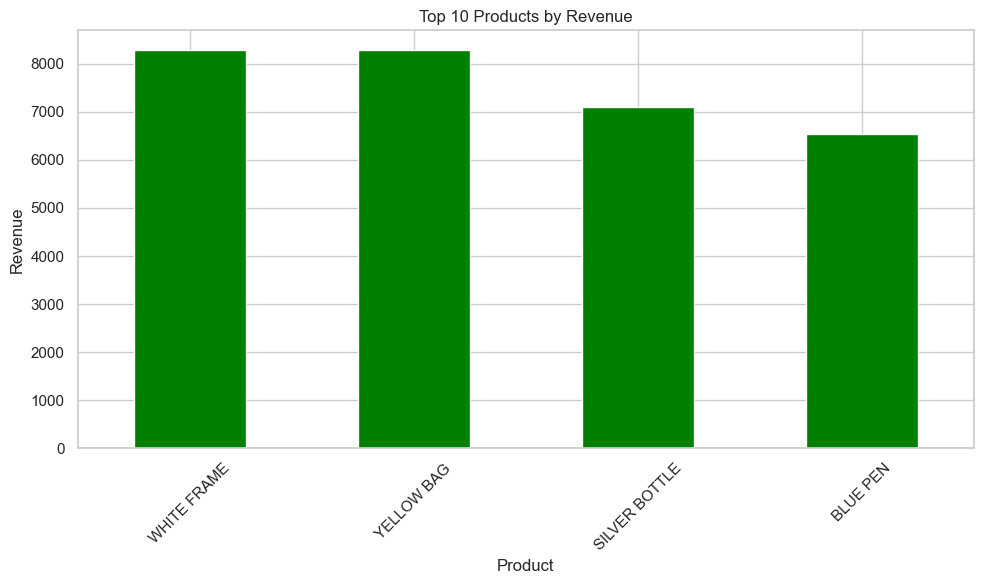

In [21]:
top_revenue = df.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_revenue.plot(kind="bar", color="green")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

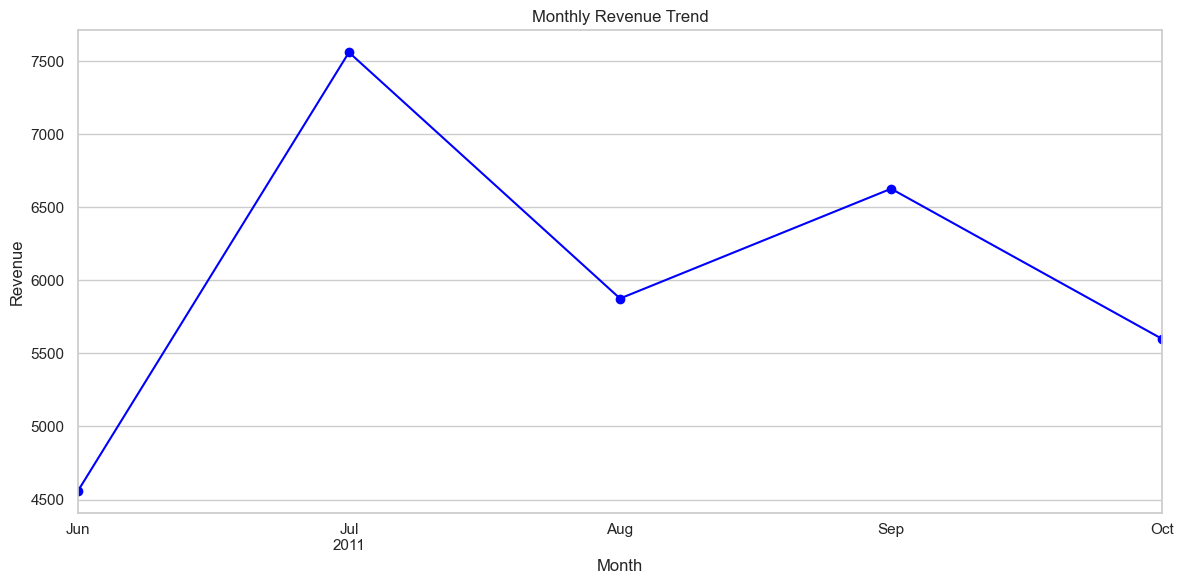

In [22]:
monthly_revenue = df.groupby("MonthYear")["TotalPrice"].sum()
plt.figure(figsize=(12,6))
monthly_revenue.plot(marker='o', color="blue")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

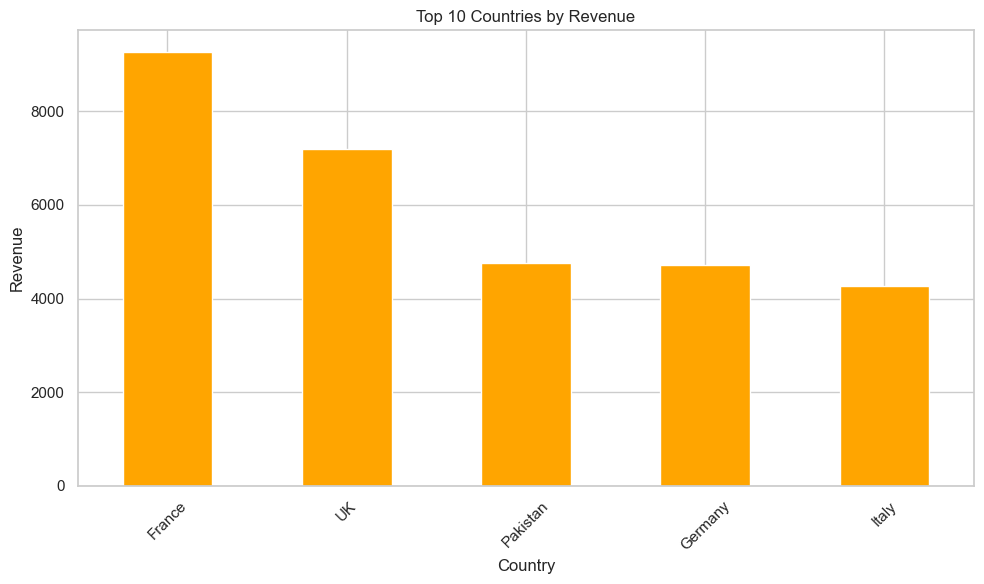

In [23]:
top_countries = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_countries.plot(kind="bar", color="orange")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
print(f"💰 Total Revenue: {round(df['TotalPrice'].sum(), 2)}")
print(f"👥 Unique Customers: {df['CustomerID'].nunique()}")
print(f"📦 Unique Products: {df['Description'].nunique()}")


💰 Total Revenue: 30216.82
👥 Unique Customers: 5
📦 Unique Products: 4


In [25]:
df.to_csv("cleaned_online_retail_friend_v2.csv", index=False)
print("\n✅ Exported cleaned data for Power BI.")


✅ Exported cleaned data for Power BI.
